In [106]:
import cv2
import numpy as np 
import os
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
from skimage import io
import matplotlib.pyplot as plt


In [107]:
input_dir = 'C:/Users/liang/OneDrive/Desktop/Maplestory-Classifier' 

In [108]:
data = []
labels = []
categories = ['Mushmom_Classification',
              'Poisonous_Mushroom_Classification',
              'Horny_Mushroom_Classification',
              'Green_Mushroom_Classification', 
              'Blue_Mushmom_Classification', 
              'Zombie_Mushmom_Classification'] 

In [109]:
for category_idx , category in enumerate(categories): 
    for file in os.listdir(os.path.join(input_dir,category)):   
        img_path = os.path.join(input_dir,category,file)
        img = imread(img_path)
        img = resize(img,(70,70))        
        data.append(img.flatten())
        labels.append(category)

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,labels,test_size= 0.25, random_state=42 )






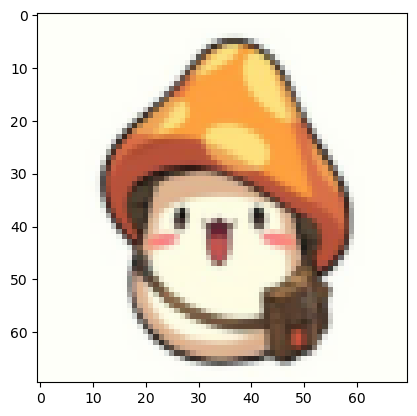

In [111]:

plt.imshow(X_test[1].reshape(img.shape))

In [112]:
i = 1
print(X_test[i],y_test[i])

[0.99607843 1.         0.97647059 ... 0.99607843 1.         0.97647059] Mushmom_Classification


In [128]:
y_train_label = (np.array(y_train) == 'Mushmom_Classification')
y_test_label = (np.array(y_test) == 'Mushmom_Classification')



#this can be unintuitive come back and look at it

print(np.array(y_train) == 'Mushmom_Classification' , y_train )




[ True False  True False False False False False  True False False False
  True False False False False False False  True False  True  True False
  True False  True False False False False False  True False False False
 False False False False False  True False False False False False False
 False  True False False  True False False False False  True False] ['Mushmom_Classification', 'Zombie_Mushmom_Classification', 'Mushmom_Classification', 'Blue_Mushmom_Classification', 'Horny_Mushroom_Classification', 'Zombie_Mushmom_Classification', 'Green_Mushroom_Classification', 'Blue_Mushmom_Classification', 'Mushmom_Classification', 'Green_Mushroom_Classification', 'Blue_Mushmom_Classification', 'Zombie_Mushmom_Classification', 'Mushmom_Classification', 'Blue_Mushmom_Classification', 'Blue_Mushmom_Classification', 'Poisonous_Mushroom_Classification', 'Zombie_Mushmom_Classification', 'Horny_Mushroom_Classification', 'Green_Mushroom_Classification', 'Mushmom_Classification', 'Zombie_Mushmom_Clas

<h1 style="font-size:24px; font-family: Arial, sans-serif;"> Testing Out All The ML Algorithms </h1>


In [114]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier 
sgd_clf = SGDClassifier(random_state=42)
cross_val_score(sgd_clf,X_train,y_train_label,cv=3,scoring='accuracy')


array([0.8       , 0.95      , 0.89473684])

In [115]:
from sklearn.svm import SVC 
svm_clf = SVC(random_state=42)  
cross_val_score(svm_clf,X_train,y_train_label,cv=3,scoring='accuracy')


array([0.7       , 0.85      , 0.78947368])

In [116]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42,max_iter=4000)  
cross_val_score(log_reg,X_train,y_train_label,cv=5,scoring='accuracy')

array([0.91666667, 0.91666667, 1.        , 0.91666667, 1.        ])

In [117]:
from sklearn.naive_bayes import GaussianNB 
guassian_nb = GaussianNB()
from sklearn.model_selection import cross_val_score
cross_val_score(guassian_nb,X_train,y_train_label,cv=3,scoring='accuracy')

array([0.65      , 0.75      , 0.94736842])

In [118]:
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier(random_state=42)
cross_val_score(rand_forest,X_train,y_train_label,cv=3,scoring='accuracy')

array([0.9       , 0.85      , 0.89473684])

<h1 style="font-size:15px; font-family: Arial, sans-serif;"> If the performance of the complex classifier is significantly better than the dummy classifier, then it suggests that the complex classifier is indeed learning meaningful patterns in the data. However, if the performance of the complex classifier is not much better than the dummy classifier, or worse than the dummy classifier, it suggests that the complex classifier is not actually learning meaningful patterns and its performance may be due to chance or overfitting. </h1>


In [119]:
from sklearn.dummy import DummyClassifier 
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train,y_train_label)
cross_val_score(dummy_clf,X_train,y_train_label,cv=3,scoring='accuracy') 

array([0.75      , 0.75      , 0.78947368])

In [120]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


scalers = [StandardScaler(),MinMaxScaler()]

def test_scaler(dataset,target,scalers,model):
    results = {}
    for scaler in scalers: 
        dataset_scaled = scaler.fit_transform(dataset)
        cross_val_score(model,dataset_scaled,target,cv=5,scoring='accuracy')
        scaler_name = type(scaler).__name__
        if scaler_name not in results:
            results[scaler_name] = cross_val_score(model,dataset_scaled,target,cv=5,scoring='accuracy')
    return results

In [121]:
log_reg = LogisticRegression(random_state=42,max_iter=5000)  
log_reg_cross_validation_test = test_scaler(X_train,y_train_label,scalers,log_reg)
print(log_reg_cross_validation_test)


{'StandardScaler': array([0.83333333, 0.91666667, 1.        , 0.91666667, 1.        ]), 'MinMaxScaler': array([0.91666667, 0.91666667, 1.        , 0.91666667, 1.        ])}


<h1 style="font-size:30px; font-family: Arial, sans-serif;"> Hyper-Tune My Model Now </h1>


In [122]:
#from sklearn.model_selection import GridSearchCV 
#param_grid = [ {
 #   'penalty': ['l1', 'l2'],
 ##   'C': [0.1, 1.0, 10.0],
  #  'solver': ['liblinear', 'saga'],
  #  'max_iter': [5000, 5500, 6000]

#} ]


In [123]:
#grid_search = GridSearchCV(log_reg,param_grid, cv = 2, scoring='accuracy')

#grid_search.fit(X_train, y_train_label)


In [124]:
#best_model = grid_search.best_estimator_
#best_model


<h1 style="font-size:30px; font-family: Arial, sans-serif;"> ConfusionMatrixDisplay</h1>


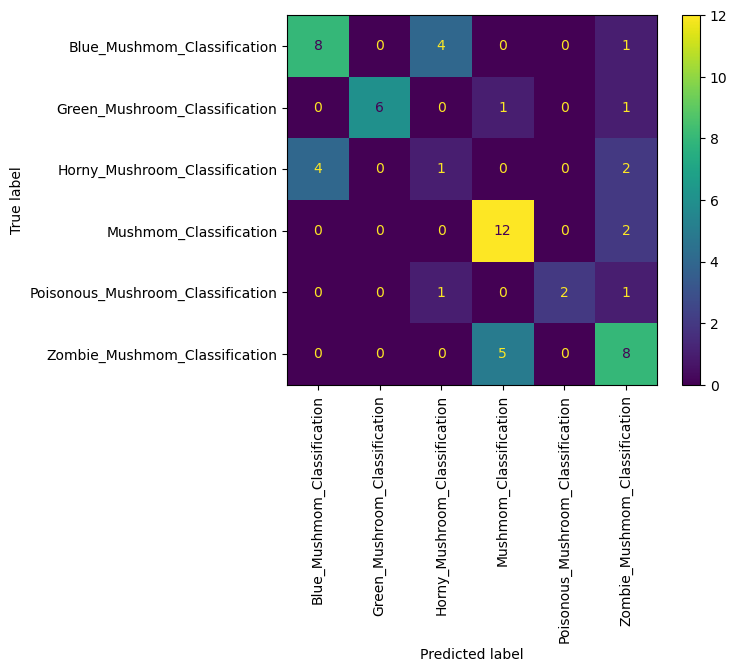

In [125]:
#We're using standard_scaler base on previously it produces better result 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
X_train_scaled = StandardScaler().fit_transform(X_train)


from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(log_reg,X_train,y_train,cv=2)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred, xticks_rotation= 90 )


In [126]:
print(len(y_train),len(X_train))

59 59


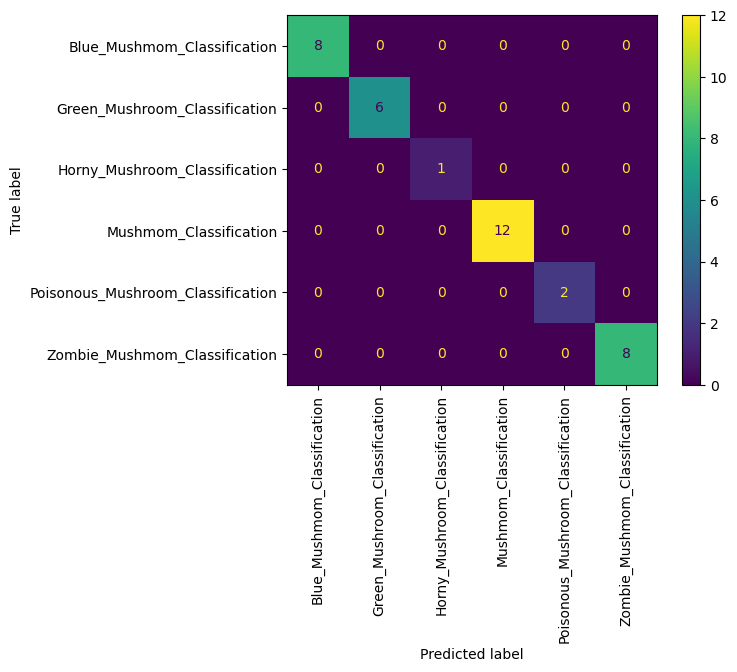

In [127]:
display = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight = (y_train == y_train_pred), xticks_rotation= 90 )

